In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

# reducers
from typing import Annotated
from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage

class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

import os
from dotenv import load_dotenv

load_dotenv()


os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY')

from langchain_openai import ChatOpenAI

llm_openAI = ChatOpenAI(model='gpt-4o')


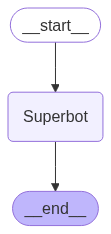

In [2]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

def superbot(state:State):
    return {"messages":[llm_openAI.invoke(state['messages'])]}

graph = StateGraph(State)

## node
graph.add_node('Superbot',superbot)

## edges
graph.add_edge(START,'Superbot')
graph.add_edge('Superbot',END)

graph_builder = graph.compile(checkpointer=memory)

# display
from IPython.display import Image,display

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [ ]:
# invocation
from pprint import pprint

config_1 = {"configurable":{"thread_id":1}}

messages = graph_builder.invoke({'messages':"Hi, My name is Deepak and I like watching youtube for technical learnings"},config=config_1)

for message in messages['messages']:
    message.pretty_print()

================================ Human Message =================================

Hi, My name is Deepak and I like watching youtube for technical learnings
================================== Ai Message ==================================

Hi Deepak! That sounds great. YouTube is a fantastic resource for technical learning with a wide range of channels and tutorials available. Are there any specific technical topics or channels you're interested in? I might be able to recommend some if you're looking for new content.


In [7]:
## Streaming the response with stream method

# create a thread
config_3 = {"configurable":{"thread_id":"3"}}

for chunk in graph_builder.stream({'messages':"Hi, My name is Deepak and I like watching movies related to practical lives"},config=config_3,stream_mode="updates"):
    print(chunk)

{'Superbot': {'messages': [AIMessage(content="Hi Deepak! Watching movies that reflect practical life can be both entertaining and insightful. These films often provide a deep look into real-world issues, human relationships, and personal growth. If you're looking for movie recommendations that focus on realistic themes or life lessons, feel free to let me know your preferences, and I’d be happy to suggest some titles you might enjoy.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 73, 'prompt_tokens': 208, 'total_tokens': 281, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BnOArs2kZobiscLm90md0iqkFaae0', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--36223800-48d

In [8]:
for chunk in graph_builder.stream({'messages':"I like watching youtube videos to learn about coding and AI"},config=config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, My name is Deepak and I like watching youtube for technical learnings', additional_kwargs={}, response_metadata={}, id='4ba4d2fa-6cec-432f-9dff-eca6dc0087dc'), AIMessage(content="Hi Deepak! It's great that you enjoy using YouTube for technical learning. There are plenty of channels that offer high-quality content on a range of technical topics, from programming and software development to electronics, mathematics, and engineering. If you have any specific areas of interest or need recommendations for channels, feel free to ask. Happy learning!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 68, 'prompt_tokens': 23, 'total_tokens': 91, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_078

In [10]:
# create a thread
config_2 = {"configurable":{"thread_id":"2"}}

async for event in graph_builder.astream_events({'messages':"Hi, My name is Deepak and I like watching movies related to practical lives"},config=config_2,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': 'Hi, My name is Deepak and I like watching movies related to practical lives'}}, 'name': 'LangGraph', 'tags': [], 'run_id': '89b43f78-f243-49d0-b7da-fb74f1be8c60', 'metadata': {'thread_id': '2'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi, My name is Deepak and I like watching movies related to practical lives', additional_kwargs={}, response_metadata={}, id='c994183b-0df3-48a5-8c23-508f7b282082')]}}, 'name': 'Superbot', 'tags': ['graph:step:1'], 'run_id': 'e5c7c835-bf0d-4245-9dc2-0358e02a58d2', 'metadata': {'thread_id': '2', 'langgraph_step': 1, 'langgraph_node': 'Superbot', 'langgraph_triggers': ('branch:to:Superbot',), 'langgraph_path': ('__pregel_pull', 'Superbot'), 'langgraph_checkpoint_ns': 'Superbot:b3e4ac37-1f13-1916-be2d-374996918bc7'}, 'parent_ids': ['89b43f78-f243-49d0-b7da-fb74f1be8c60']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[Hum